# Load Data

In [26]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="./DataSet/DataRGB2/test")

Resolving data files:   0%|          | 0/400 [00:00<?, ?it/s]

Using custom data configuration default-e509f5d875264523


Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to C:/Users/Admin/.cache/huggingface/datasets/imagefolder/default-e509f5d875264523/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
labels = data['train'].features['label'].names

NameError: name 'data' is not defined

In [7]:
labels

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

# Load Model

In [ ]:
from transformers import BeitImageProcessor, BeitForImageClassification
model_name_or_path = "./model/vit-LungCancer2e-5_cp4710/checkpoint-4710/"
feature_extractor = BeitImageProcessor.from_pretrained(model_name_or_path)

labels = ['adenocarcinoma',
 'large.cell',
 'normal',
 'squamous.cell']

model = BeitForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

In [ ]:
model

In [ ]:
model

In [ ]:

from PIL import Image

from torch import nn

image = Image.open("000108 (3).png")

encoding = feature_extractor(image, return_tensors="pt")
outputs = model(**encoding)
logits  = outputs.logits
pred_logis = nn.functional.softmax(logits, dim=-1)[0][outputs.logits.argmax(-1).item()].item()
pred = logits.argmax(-1)[0].item()
print(pred_logis)
print(pred)

# ROC Curve

In [24]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="./DataSet/DaAug/testMini")

Resolving data files:   0%|          | 0/315 [00:00<?, ?it/s]

Using custom data configuration default-455feca7cbb07c88


Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to C:/Users/Admin/.cache/huggingface/datasets/imagefolder/default-455feca7cbb07c88/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 400
    })
})

In [ ]:
dataset["train"]['label']

In [29]:
import torch
from torch import nn

In [30]:
if torch.cuda.is_available():
    model.cuda()

In [31]:
# Import pandas library
import pandas as pd
  
df = pd.DataFrame(columns = ['y_true', 'y_pred',])  
df
  

,y_true,y_pred


In [32]:
for i in range(5):                                 
    new_row = pd.Series({'y_true': i, 'y_pred': i**2})
    pd.concat([df, new_row.to_frame().T], ignore_index=True)  

In [33]:
# Confusion Matrix
import torch
import torch.nn.functional as F
from sklearn import metrics
import copy

classes = ['adenocarcinoma',
 'large.cell.carcinoma',
 'normal',
 'squamous.cell']
df = pd.DataFrame(columns = ['y_true', 'y_pred', 'y_pred_proba'])  
 
y_preds = []
y_trues = []
for index,val_item in enumerate(dataset["train"]):
     img = val_item["image"]
     encoding = feature_extractor(images=img, return_tensors="pt").to("cuda")
     outputs = model(**encoding)
     y_pred = outputs.logits.argmax(-1).item()
     y_true = classes[val_item["label"]]
     y_preds.append(y_pred)
     y_trues.append(y_true)
     logits  = outputs.logits
     pred_logis = nn.functional.softmax(logits, dim=-1)[0].tolist()
     df=df.append({'y_true': y_true, 'y_pred': classes[y_pred], 'y_pred_proba':pred_logis}, ignore_index=True)
     print(f"{index} out of {len(dataset['train'])}")

0 out of 400
1 out of 400
2 out of 400
3 out of 400
4 out of 400
5 out of 400
6 out of 400
7 out of 400
8 out of 400
9 out of 400
10 out of 400
11 out of 400
12 out of 400
13 out of 400
14 out of 400
15 out of 400
16 out of 400
17 out of 400
18 out of 400
19 out of 400
20 out of 400
21 out of 400
22 out of 400
23 out of 400
24 out of 400
25 out of 400
26 out of 400
27 out of 400
28 out of 400
29 out of 400
30 out of 400
31 out of 400
32 out of 400
33 out of 400
34 out of 400
35 out of 400
36 out of 400
37 out of 400
38 out of 400
39 out of 400
40 out of 400
41 out of 400
42 out of 400
43 out of 400
44 out of 400
45 out of 400
46 out of 400
47 out of 400
48 out of 400
49 out of 400
50 out of 400
51 out of 400
52 out of 400
53 out of 400
54 out of 400
55 out of 400
56 out of 400
57 out of 400
58 out of 400
59 out of 400
60 out of 400
61 out of 400
62 out of 400
63 out of 400
64 out of 400
65 out of 400
66 out of 400
67 out of 400
68 out of 400
69 out of 400
70 out of 400
71 out of 400
72

In [34]:
df

,y_true,y_pred,y_pred_proba
0,adenocarcinoma,adenocarcinoma,"[0.9999998807907104, 2.589297443122973e-09, 1...."
1,adenocarcinoma,adenocarcinoma,"[0.9999997615814209, 1.7878223346201594e-09, 2..."
2,adenocarcinoma,adenocarcinoma,"[0.999987006187439, 1.273893990294539e-09, 9.7..."
3,adenocarcinoma,adenocarcinoma,"[0.9996687173843384, 7.39485039957799e-05, 1.2..."
4,adenocarcinoma,adenocarcinoma,"[0.999997615814209, 7.082943120906293e-10, 9.2..."
...,...,...,...
395,squamous.cell,squamous.cell,"[3.566479733763117e-07, 7.594385920128843e-08,..."
396,squamous.cell,squamous.cell,"[8.275717888750478e-09, 1.1342042682827014e-07..."
397,squamous.cell,squamous.cell,"[5.943781911099677e-09, 1.158784002086577e-07,..."
398,squamous.cell,squamous.cell,"[7.160911863479669e-09, 2.4028065581660485e-07..."


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [37]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [38]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [39]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [40]:
import warnings
warnings.filterwarnings('ignore')

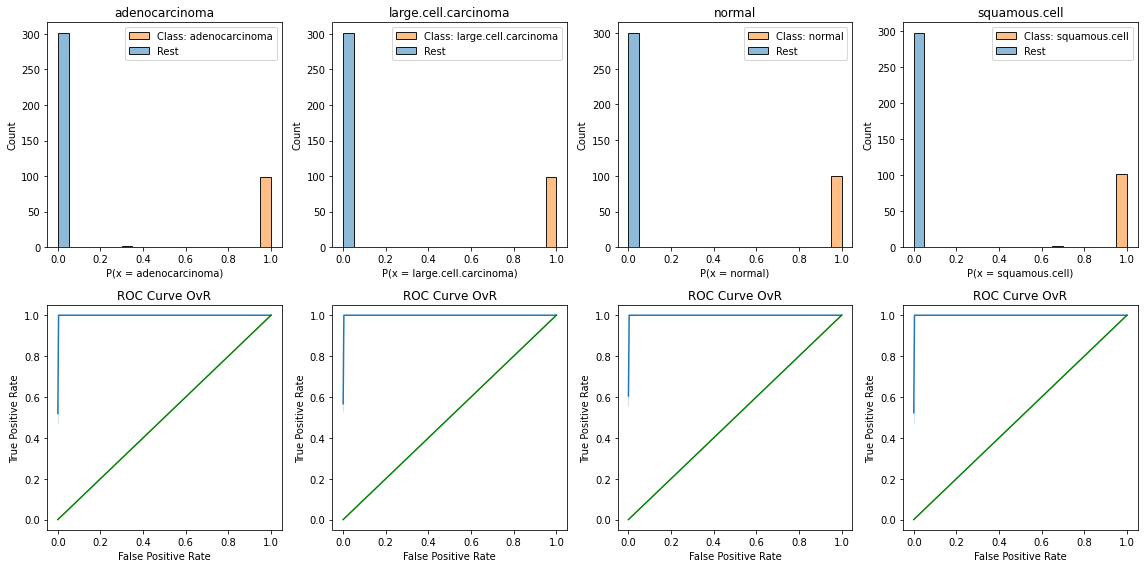

In [41]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

classes = ['adenocarcinoma',
 'large.cell.carcinoma',
 'normal',
 'squamous.cell']


for i in range(len(classes)):
    c = classes[i]
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = df.copy()
    df_aux['class'] = [1 if y == c else 0 for y in df['y_pred']]
    df_aux['prob'] = [prob[i] for prob in df['y_pred_proba']]
    df_aux = df_aux.reset_index(drop = True)
    # txt = "out{}.csv" 
    # df_aux.to_csv(txt.format(i))

     # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()

In [42]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

adenocarcinoma ROC AUC OvR: 1.0000
large.cell.carcinoma ROC AUC OvR: 1.0000
normal ROC AUC OvR: 1.0000
squamous.cell ROC AUC OvR: 1.0000
average ROC AUC OvR: 1.0000


In [43]:
df['y_pred_proba']

0      [0.9999998807907104, 2.589297443122973e-09, 1....
1      [0.9999997615814209, 1.7878223346201594e-09, 2...
2      [0.999987006187439, 1.273893990294539e-09, 9.7...
3      [0.9996687173843384, 7.39485039957799e-05, 1.2...
4      [0.999997615814209, 7.082943120906293e-10, 9.2...
                             ...                        
395    [3.566479733763117e-07, 7.594385920128843e-08,...
396    [8.275717888750478e-09, 1.1342042682827014e-07...
397    [5.943781911099677e-09, 1.158784002086577e-07,...
398    [7.160911863479669e-09, 2.4028065581660485e-07...
399    [2.003145382900584e-08, 1.1175397673923726e-07...
Name: y_pred_proba, Length: 400, dtype: object

In [44]:
df['y_pred']

0      adenocarcinoma
1      adenocarcinoma
2      adenocarcinoma
3      adenocarcinoma
4      adenocarcinoma
            ...      
395     squamous.cell
396     squamous.cell
397     squamous.cell
398     squamous.cell
399     squamous.cell
Name: y_pred, Length: 400, dtype: object

In [45]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
import numpy as np
dfx = df['y_pred_proba'].to_numpy()
listX =[]
for i in range(len(dfx)):
    listX.append(dfx[i])
pred_proba = np.array(listX)


roc_auc_score(df['y_pred'], pred_proba, labels = classes, multi_class = 'ovr', average = 'macro')

1.0

In [46]:
for prob in df['y_pred_proba']:
    print(prob[0])

0.9999998807907104
0.9999997615814209
0.999987006187439
0.9996687173843384
0.999997615814209
0.9999998807907104
0.9999990463256836
0.9999988079071045
0.9999994039535522
0.9999986886978149
0.9999984502792358
0.9999996423721313
0.9999983310699463
0.9999991655349731
0.9999933242797852
0.999998927116394
0.9999974966049194
0.9999995231628418
0.9999998807907104
0.9999996423721313
0.9999854564666748
0.999994158744812
0.9999983310699463
0.9999992847442627
0.9999991655349731
0.9999995231628418
0.9999996423721313
0.9999995231628418
0.0002812340680975467
0.9999977350234985
0.9999948740005493
7.689672202104703e-06
0.9999910593032837
0.9999996423721313
0.9999310970306396
0.9999912977218628
0.9999961853027344
0.9999990463256836
0.9999995231628418
0.9999986886978149
0.9999980926513672
0.9999998807907104
0.9999992847442627
0.9999997615814209
0.9999996423721313
0.999995231628418
0.9999994039535522
0.9999994039535522
0.9999997615814209
0.999996542930603
0.9999984502792358
0.9999994039535522
0.9999978542

# Confusuin martix

In [47]:
y_preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [48]:
y_trues

['adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarci

In [49]:
y_truesID = []

In [50]:
for classN in y_trues:
    if classN == 'adenocarcinoma':
        y_truesID.append(int(0))
    elif classN == 'large.cell.carcinoma':
        y_truesID.append(int(1))
    elif classN == 'normal':
        y_truesID.append(int(2))
    else:
        y_truesID.append(int(3))

In [51]:
y_truesID

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


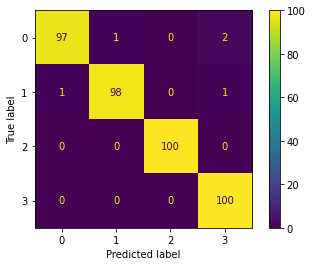

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix([int(x) for x in y_truesID], [x for x in y_preds], labels=[x for x in range(4)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
width, height= image.size
print(width)
print(height)

In [ ]:
display(image)

In [11]:
feature_extractor

BeitFeatureExtractor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": false,
  "do_normalize": true,
  "do_reduce_labels": false,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "BeitFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "BeitFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [12]:
def process_example(example):
    inputs = feature_extractor(example, return_tensors='pt')
    return inputs

In [13]:
import glob
import random
from PIL import Image, ImageOps

image = Image.open("000108 (3).png")
process_example(image)

{'pixel_values': tensor([[[[-0.9922, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9922, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9922, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1

In [18]:
from transformers import BeitFeatureExtractor, BeitForImageClassification
from PIL import Image
import requests

image = Image.open("000108 (3).png")
model_name_or_path = "checkpoint-1644"
image = image.resize((224,224))
feature_extractor = BeitFeatureExtractor.from_pretrained(model_name_or_path)
labels = ['adenocarcinoma',
 'large.cell.carcinoma',
 'normal',
 'squamous.cell.carcinoma']
model = BeitForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 4 classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:" + labels[predicted_class_idx])

Predicted class:adenocarcinoma


# Check duplicate data

In [39]:
from difPy import dif
search = dif(["./DataSet/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/", "./DataSet/Data/test/squamous.cell.carcinoma/", "./DataSet/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/", ])

difPy preparing files: [243/243] [100%]
difPy comparing images: [243/243] [100%]
Found 0 pair(s) of duplicate image(s) in 5.14 seconds.


In [ ]:
from difPy import dif
search = dif(["./DataSet/Data/train", "./DataSet/Data/test", "./DataSet/Data/valid", ])

In [41]:
search.result

{28760889469516173401723076592912788701: {'location': 'DataSet\\Data\\train\\large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa\\l4.png',
  'matches': {32395808410271971641834764686679392267: {'location': 'DataSet\\Data\\train\\squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa\\sq2.png',
    'mse': 0.0}}},
 36579070754311943076263871337808923067: {'location': 'DataSet\\Data\\valid\\normal\\7 - Copy (3).png',
  'matches': {317652843055825206771657845114485971123: {'location': 'DataSet\\Data\\valid\\normal\\7.png',
    'mse': 0.0}}}}

In [15]:
predicted_class_idx

0

# balance DATA

In [1]:
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import time
from tqdm import tqdm
from sklearn.metrics import f1_score
from IPython.display import YouTubeVideo
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
print('All modules have been imported')

All modules have been imported


In [2]:
def make_dataframes(train_dir,test_dir, val_dir):
    bad_images=[]
    dirlist=[train_dir, test_dir, val_dir]
    names=['train','test', 'valid']
    zipdir=zip(names, dirlist)
    for name,d in zipdir:
        filepaths=[]
        labels=[]
        classlist=sorted(os.listdir(d) )       
        for klass in classlist:
            # class names are very long so make psuedo names
            if 'adenocarcinoma' in klass:
                label='adenocarcinoma'
            elif 'large.cell' in klass:
                label='large.cell'
            elif 'squamous.cell' in klass:
                label='squamous.cell'
            else:
                label='normal'
            classpath=os.path.join(d, klass)           
            flist=sorted(os.listdir(classpath)) 
            desc=f'{name:6s}-{label:25s}'
            for f in tqdm(flist, ncols=130,desc=desc, unit='files', colour='blue'):
                fpath=os.path.join(classpath,f)
                try:
                    img=cv2.imread(fpath)
                    shape=img.shape
                    filepaths.append(fpath)
                    labels.append(label)
                except:
                    print (fpath, ' is an invalid image file')
                    bad_images.append(fpath)
        Fseries=pd.Series(filepaths, name='filepaths')
        Lseries=pd.Series(labels, name='labels')
        df=pd.concat([Fseries, Lseries], axis=1) 
        if name =='valid':
            valid_df=df
        elif name == 'test':
            test_df=df
        else:
            train_df=df    
    classes=sorted(train_df['labels'].unique())
    class_count=len(classes)
    sample_df=train_df.sample(n=50, replace=False)
    # calculate the average image height and with
    ht=0
    wt=0
    count=0
    for i in range(len(sample_df)):
        fpath=sample_df['filepaths'].iloc[i]
        try:
            img=cv2.imread(fpath)
            h=img.shape[0]
            w=img.shape[1]
            wt +=w
            ht +=h
            count +=1
        except:
            pass
    have=int(ht/count)
    wave=int(wt/count)
    aspect_ratio=have/wave
    print('number of classes in processed dataset= ', class_count)    
    counts=list(train_df['labels'].value_counts())    
    print('the maximum files in any class in train_df is ', max(counts), '  the minimum files in any class in train_df is ', min(counts))
    print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))  
    print('average image height= ', have, '  average image width= ', wave, ' aspect ratio h/w= ', aspect_ratio) 
    if len(bad_images)>0:
        print_in_color('Below is a list of invalid image files')
        for f in bad_images:
            print (f)
    return train_df, test_df, valid_df, classes, class_count

train_dir = r'./DataSet/Data/split/train'
val_dir=r'./DataSet/Data/split/val'
test_dir=r'./DataSet/Data/split/test'
train_df, test_df, valid_df, classes, class_count=make_dataframes(train_dir, test_dir, val_dir)

valid -squamous.cell            : 100%|█████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.08files/s]


number of classes in processed dataset=  4
the maximum files in any class in train_df is  2500   the minimum files in any class in train_df is  908
train_df length:  7326   test_df length:  400   valid_df length:  400
average image height=  354   average image width=  481  aspect ratio h/w=  0.735966735966736


In [3]:
def balance(df, n,column, working_dir, img_size):
    df=df.copy()
    print('Initial length of dataframe is ', len(df))
    aug_dir=os.path.join(working_dir, 'aug')# directory to store augmented images
    if os.path.isdir(aug_dir):# start with an empty directory
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)        
    for label in df[column].unique():    
        dir_path=os.path.join(aug_dir,label)    
        os.mkdir(dir_path) # make class directories within aug directory
    # create and store the augmented images  
    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2)
    groups=df.groupby(column) # group by class
    for label in df[column].unique():  # for every class               
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
        sample_count=len(group)   # determine how many samples there are in this class  
        if sample_count< n: # if the class has less than target number of images
            aug_img_count=0
            delta=n - sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images
            msg='{0:40s} for class {1:^30s} creating {2:^5s} augmented images'.format(' ', label, str(delta))
            print(msg, '\r', end='') # prints over on the same line
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=img_size,
                                            class_mode=None, batch_size=1, shuffle=False, 
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)            
                aug_img_count += len(images)
            total +=aug_img_count
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    aug_fpaths=[]
    aug_labels=[]
    classlist=sorted(os.listdir(aug_dir))
    for klass in classlist:
        classpath=os.path.join(aug_dir, klass)     
        flist=sorted(os.listdir(classpath))    
        for f in flist:        
            fpath=os.path.join(classpath,f)         
            aug_fpaths.append(fpath)
            aug_labels.append(klass)
    Fseries=pd.Series(aug_fpaths, name='filepaths')
    Lseries=pd.Series(aug_labels, name='labels')   
    aug_df=pd.concat([Fseries, Lseries], axis=1)         
    df=pd.concat([df,aug_df], axis=0).reset_index(drop=True)
    print('Length of augmented dataframe is now ', len(df))
    return df 

n=2500
working_dir=r'./DataSet/Aug_10000'
column='labels'
img_size=(224,224)
train_df=balance(train_df, n, column, working_dir, img_size)

Initial length of dataframe is  7326
Found 908 validated image filenames.     for class         adenocarcinoma         creating 1592  augmented images 
Found 1418 validated image filenames.    for class           large.cell           creating 1082  augmented images 
Total Augmented images created=  2674
Length of augmented dataframe is now  10000


# split data

In [63]:
!pip install split-folders

In [1]:
import splitfolders # or import splitfolders
input_folder = "./DataSet/Data/train/"
output = "./DataSet/Data/split/" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 6086 files [00:26, 232.63 files/s]


# convert RGNA to RGB

In [18]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="./DataSet/DaAug2/test/")

Resolving data files:   0%|          | 0/400 [00:00<?, ?it/s]

Using custom data configuration default-1c71cc6edfb1ec77


Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to C:/Users/Admin/.cache/huggingface/datasets/imagefolder/default-1c71cc6edfb1ec77/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 400
    })
})

In [20]:
import PIL
from PIL import Image
import numpy as np

In [22]:
dataset['train'][0]['label']

0

In [21]:
from tqdm.notebook import tqdm

In [22]:
dataList = ['train', 'validation']
classes = ['adenocarcinoma', 'large.cell', 'normal', 'squamous.cell']
data = 'train'
for i in tqdm(range(len(dataset[data]))):
    rgba_image = dataset[data][i]['image']
    rgb_image = rgba_image.convert('RGB')
    rgb_img_resized = rgb_image.resize((224,224))
    classN = classes[dataset[data][i]['label']]
    rgb_img_resized.save("./DataSet/DataRGB2/test/{1}/{2}_{3}_{4}.png" .format(data, classN, data[0:3], classN[0:3], str(i)))

  0%|          | 0/400 [00:00<?, ?it/s]

In [15]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="./DataSet/DataRGB2/train")

Resolving data files:   0%|          | 0/10000 [00:00<?, ?it/s]

Using custom data configuration default-f9029b5b1c8bdad4


Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to C:/Users/Admin/.cache/huggingface/datasets/imagefolder/default-f9029b5b1c8bdad4/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [21]:
import numpy as np

In [22]:
img = dataset['train'][0]['image']
arrimg = np.array(img)
print(arrimg.shape)

(247, 341, 3)


In [12]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
import tensorflow as tf
import datetime

In [15]:
%tensorboard --logdir 'C:\Users\Admin\Desktop\chest-CT\model\modelBeit\Beit-LungCancer2e-4_cp4710V2\runs\Apr13_01-02-32_5a27b9e0f897'